Download the dataset from: https://www.kaggle.com/c/analyticsclubproject/data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shutil

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, cross_val_predict

from sklearn import metrics

In [ ]:
shutil.unpack_archive('analyticsclubproject.zip')

# Import Data and Analysis

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
ss = pd.read_csv('sample_submission.csv')

In [3]:
train_data.head(-1)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10156551,18375,6,1,95000.0,2,1,21.45,3,17,28,1,3.0
1,10115057,4000,3,4,-1.0,2,2,21.64,0,18,33,0,2.0
2,10030395,15000,10,1,83000.0,2,2,22.90,3,11,44,1,3.0
3,10158544,27500,10,0,100000.0,1,2,9.66,0,5,14,1,2.0
4,10117658,9450,-1,5,28000.0,0,1,34.89,1,9,24,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131441,10127326,5000,4,5,50000.0,2,2,14.71,0,8,18,0,2.0
131442,10116135,5700,0,1,32000.0,0,2,31.16,1,7,8,1,3.0
131443,10123610,7400,0,5,-1.0,0,1,8.85,0,6,14,1,1.0
131444,10039371,19400,6,5,58000.0,2,2,30.33,1,9,51,0,2.0


In [4]:
train_data.describe()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
count,1.314470e+05,131447.000000,131447.000000,131447.000000,1.314470e+05,131447.000000,131447.000000,131447.000000,131447.000000,131447.000000,131447.000000,131447.000000,131447.000000
mean,1.008209e+07,14340.721355,5.682640,2.168486,6.208692e+04,0.955762,2.644937,17.198859,0.779683,11.189932,25.041895,0.713192,2.156375
std,4.742568e+04,8289.462686,3.827135,2.284534,6.383006e+04,0.822101,2.393371,7.844181,1.031655,4.993654,11.569347,0.452273,0.738183
min,1.000000e+07,500.000000,-1.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
25%,1.004103e+07,8000.000000,2.000000,0.000000,3.500000e+04,0.000000,2.000000,11.360000,0.000000,8.000000,17.000000,0.000000,2.000000
50%,1.008206e+07,12000.000000,6.000000,1.000000,5.600000e+04,1.000000,2.000000,16.830000,0.000000,10.000000,23.000000,1.000000,2.000000
75%,1.012311e+07,20000.000000,10.000000,5.000000,8.200000e+04,2.000000,2.000000,22.780000,1.000000,14.000000,32.000000,1.000000,3.000000
max,1.016431e+07,35000.000000,10.000000,5.000000,7.500000e+06,2.000000,13.000000,39.990000,8.000000,62.000000,156.000000,1.000000,3.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131447 entries, 0 to 131446
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                131447 non-null  int64  
 1   Loan_Amount_Requested  131447 non-null  int64  
 2   Length_Employed        131447 non-null  int64  
 3   Home_Owner             131447 non-null  int64  
 4   Annual_Income          131447 non-null  float64
 5   Income_Verified        131447 non-null  int64  
 6   Purpose_Of_Loan        131447 non-null  int64  
 7   Debt_To_Income         131447 non-null  float64
 8   Inquiries_Last_6Mo     131447 non-null  int64  
 9   Number_Open_Accounts   131447 non-null  int64  
 10  Total_Accounts         131447 non-null  int64  
 11  Gender                 131447 non-null  int64  
 12  Interest_Rate          131447 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 13.0 MB


In [6]:
train_data['Interest_Rate'].value_counts()

2.0    56606
3.0    47698
1.0    27143
Name: Interest_Rate, dtype: int64

In [7]:
for i in train_data.columns:
    print(print('\033[1m'+i+'\033[0m'))
    print(train_data[i].value_counts())
    print()

Loan_ID
None
10000403    1
10041714    1
10123802    1
10119704    1
10097175    1
           ..
10126586    1
10132729    1
10153207    1
10151158    1
10000365    1
Name: Loan_ID, Length: 131447, dtype: int64

Loan_Amount_Requested
None
10000    9393
12000    7179
15000    6773
20000    6378
35000    4684
         ... 
33325       1
30725       1
30950       1
30775       1
23650       1
Name: Loan_Amount_Requested, Length: 1273, dtype: int64

Length_Employed
None
 10    42275
 2     11685
 3     10400
 0     10187
 5      8662
 1      8313
 4      7812
 7      7515
 6      7330
 8      6302
-1      5892
 9      5074
Name: Length_Employed, dtype: int64

Home_Owner
None
0    56237
5    44968
1    20236
4     9956
3       41
2        9
Name: Home_Owner, dtype: int64

Annual_Income
None
-1.00        19262
 60000.00     4418
 50000.00     3846
 65000.00     3215
 40000.00     3099
             ...  
 63980.80        1
 80475.00        1
 40077.00        1
 53292.00        1
 55497.78    

In [8]:
train_data.skew()

Loan_ID                   0.000453
Loan_Amount_Requested     0.728850
Length_Employed          -0.220205
Home_Owner                0.303914
Annual_Income            35.937803
Income_Verified           0.081970
Purpose_Of_Loan           2.396154
Debt_To_Income            0.193719
Inquiries_Last_6Mo        1.548650
Number_Open_Accounts      1.163224
Total_Accounts            0.822154
Gender                   -0.942775
Interest_Rate            -0.256266
dtype: float64

#### Insight
Binning Loan_Amount_Requested, Annual_Income, Debt_to_Income, Total_accounts\
Create Debt, Homeless/rental, income logs?, 0 verified sources of income, 0 purpose for loan\
Imbalace in Interest_Rate, Gender\
One hot encode Purpose of Loan\
Missing values(-1): Length_Employed, Annual_Income 

Skewed Distributions Annual_Income, Inquiries,Number of open accounts

# Feature Engineering

#### Income

C:\Users\kunal.LAPTOP-7LV8BFT8\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Income', ylabel='Density'>

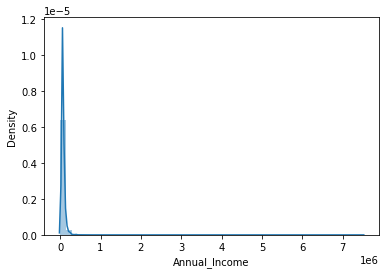

In [9]:
sns.distplot(train_data['Annual_Income'])

In [10]:
train_data['Annual_Income'] = train_data['Annual_Income'].clip(upper=140000)
test_data['Annual_Income'] = test_data['Annual_Income'].clip(upper=140000)

#Replace -1 values with mean of Annual_Income
mean = train_data[train_data.Annual_Income>0].mean().Annual_Income
train_data['Annual_Income'] = train_data['Annual_Income'].apply(lambda x: mean if x<=0 else x)
test_data['Annual_Income'] = test_data['Annual_Income'].apply(lambda x: mean if x<=0 else x)

C:\Users\kunal.LAPTOP-7LV8BFT8\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Annual_Income'>

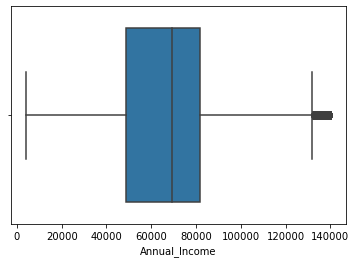

In [11]:
#Deal with the outliers
sns.boxplot(train_data['Annual_Income'])

-0.4338488347169785
0.7643425193563465


C:\Users\kunal.LAPTOP-7LV8BFT8\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LogAnnual_Income', ylabel='Density'>

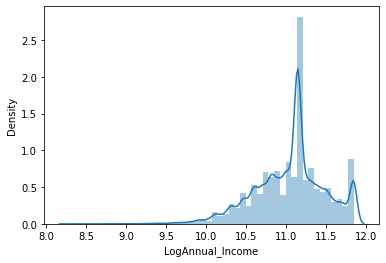

In [12]:
train_data['LogAnnual_Income'] = train_data['Annual_Income'].map(lambda x: np.log(x) if x>0 else 0)
test_data['LogAnnual_Income'] = test_data['Annual_Income'].map(lambda x: np.log(x) if x>0 else 0)

print(train_data['LogAnnual_Income'].skew())
print(train_data['Annual_Income'].skew())
sns.distplot(train_data['LogAnnual_Income'])

In [13]:
#Binning Annual Income        
train_data['Annual_Income_Bin'] = pd.cut(train_data['Annual_Income'],bins=[-np.inf,50000,100000,500000,np.inf], labels=[1,2,3,4]).astype(int)

test_data['Annual_Income_Bin'] = pd.cut(test_data['Annual_Income'],bins=[-np.inf,50000,100000,500000,np.inf], labels=[1,2,3,4]).astype(int)

C:\Users\kunal.LAPTOP-7LV8BFT8\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Income_Bin', ylabel='Density'>

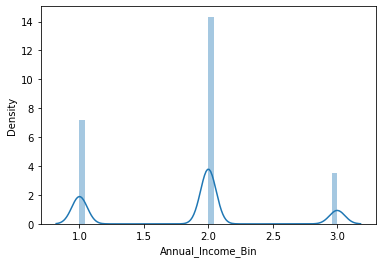

In [14]:
sns.distplot(train_data['Annual_Income_Bin'])

###### Debt

In [15]:
#Monthly Debt
train_data['Debt'] = train_data['Annual_Income']*train_data['Debt_To_Income']

test_data['Debt'] = test_data['Annual_Income']*test_data['Debt_To_Income']

C:\Users\kunal.LAPTOP-7LV8BFT8\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Debt', ylabel='Density'>

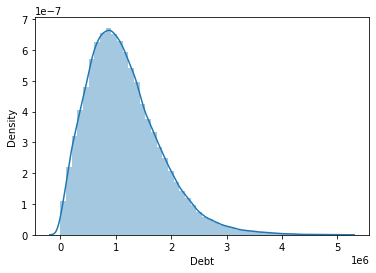

In [16]:
sns.distplot(train_data['Debt'])

C:\Users\kunal.LAPTOP-7LV8BFT8\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


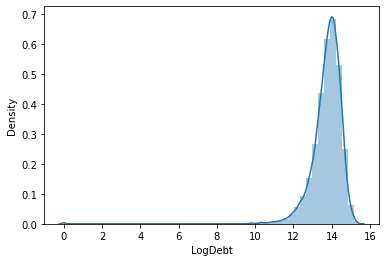

In [17]:
train_data['LogDebt'] = train_data['Debt'].apply(lambda x: np.log(x) if x!= 0 else 0)
sns.distplot(train_data['LogDebt'])

test_data['LogDebt'] = test_data['Debt'].apply(lambda x: np.log(x) if x!= 0 else 0)

In [18]:
#Binning Debt
train_data['Debt_To_Income_Bin'] = pd.cut(train_data['Debt_To_Income'], bins=[-np.inf,0,10,20,30,np.inf],labels=[0,1,2,3,4]).astype(int)

test_data['Debt_To_Income_Bin'] = pd.cut(test_data['Debt_To_Income'], bins=[-np.inf,0,10,20,30,np.inf],labels=[0,1,2,3,4]).astype(int)

In [19]:
#Credit Rating
train_data['Credit_rating'] = train_data['Debt']*0.4+train_data['Annual_Income']*0.45+train_data['Purpose_Of_Loan']*0.1

test_data['Credit_rating'] = test_data['Debt']*0.4+test_data['Annual_Income']*0.45+test_data['Purpose_Of_Loan']*0.1

In [20]:
train_data[train_data.Length_Employed>0].mode()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,LogAnnual_Income,Annual_Income_Bin,Debt,LogDebt,Debt_To_Income_Bin,Credit_rating
0,10000002,10000.0,10.0,0.0,69436.491022,0.0,2.0,18.0,0.0,9.0,21.0,1.0,2.0,11.148168,2.0,0.0,0.0,2.0,471196.228079
1,10000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115363,10164305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115364,10164306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115365,10164307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115366,10164308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:

#Missing Lenght_Employed values values
train_data['Length_Employed'] = train_data['Length_Employed'].apply(lambda x: 10 if x==-1 else x).astype(int)

test_data['Length_Employed'] = test_data['Length_Employed'].apply(lambda x: 10 if x==-1 else x).astype(int)

In [22]:
#Binning Length Employed
train_data['Senior_Experience'] = pd.cut(train_data['Length_Employed'], bins=[-np.inf,6,np.inf], labels=[0,1]).astype(int)

test_data['Senior_Experience'] = pd.cut(test_data['Length_Employed'], bins=[-np.inf,6,np.inf], labels=[0,1]).astype(int)

In [23]:
#Homeless/rental
l = []
for i in range(len(train_data['Home_Owner'])):
    if train_data['Home_Owner'][i]==0 and train_data['Annual_Income'][i]==0:
        l.append(1)
    elif train_data['Home_Owner'][i]==0:
        l.append(2)
    else: l.append(0)

train_data['Homeless/rental'] = l

l = []
for i in range(len(test_data['Home_Owner'])):
    if test_data['Home_Owner'][i]==0 and test_data['Annual_Income'][i]==0:
        l.append(1)
    elif test_data['Home_Owner'][i]==0:
        l.append(2)
    else: l.append(0)

test_data['Homeless/rental'] = l

C:\Users\kunal.LAPTOP-7LV8BFT8\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Requested', ylabel='Density'>

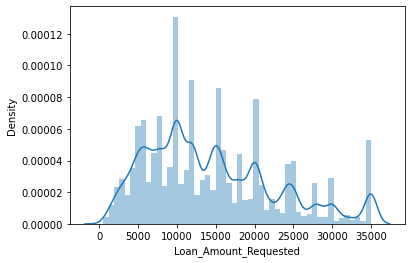

In [24]:
sns.distplot(train_data['Loan_Amount_Requested'])

In [25]:
#Binning Loan amount Requested
train_data['Loan_Amount_Bin'] = pd.cut(train_data['Loan_Amount_Requested'], bins=[-np.inf,5000,10000,15000,20000,25000,30000,35000], labels=[0,1,2,3,4,5,6]).astype(int)

test_data['Loan_Amount_Bin'] = pd.cut(test_data['Loan_Amount_Requested'], bins=[-np.inf,5000,10000,15000,20000,25000,30000,35000], labels=[0,1,2,3,4,5,6]).astype(int)

C:\Users\kunal.LAPTOP-7LV8BFT8\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Bin', ylabel='Density'>

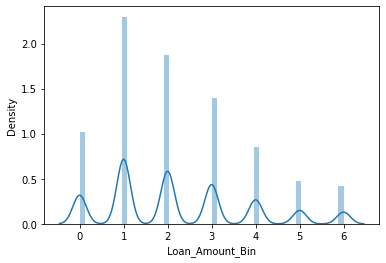

In [26]:
sns.distplot(train_data['Loan_Amount_Bin'])

In [27]:
#Binning the number of open accounts
train_data['Open_Accounts_Bin'] = pd.cut(train_data['Number_Open_Accounts'], bins=[-np.inf,10,20,30,np.inf], labels=[0,1,2,3]).astype(int)

test_data['Open_Accounts_Bin'] = pd.cut(test_data['Number_Open_Accounts'], bins=[-np.inf,10,20,30,np.inf], labels=[0,1,2,3]).astype(int)

In [28]:
#Binning the number of open accounts
train_data['Total_Accounts_Bin'] = pd.cut(train_data['Total_Accounts'], bins=[-np.inf,10,20,30,np.inf], labels=[0,1,2,3]).astype(int)

test_data['Total_Accounts_Bin'] = pd.cut(test_data['Total_Accounts'], bins=[-np.inf,10,20,30,np.inf], labels=[0,1,2,3]).astype(int)

In [29]:
#Unused accounts:
train_data['Unused_Accounts'] = train_data['Total_Accounts'] - train_data['Number_Open_Accounts']

test_data['Unused_Accounts'] = test_data['Total_Accounts'] - test_data['Number_Open_Accounts']

In [30]:
#Hot encode purpose 
train_data = pd.get_dummies(train_data, columns=['Purpose_Of_Loan'])

test_data = pd.get_dummies(test_data, columns=['Purpose_Of_Loan'])

In [31]:
plt.figure(figsize=(12,12))
corr = train_data.corr()
corr.Interest_Rate

Loan_ID                  0.000429
Loan_Amount_Requested    0.134057
Length_Employed          0.034420
Home_Owner               0.056069
Annual_Income           -0.076022
Income_Verified         -0.214527
Debt_To_Income           0.153285
Inquiries_Last_6Mo       0.189202
Number_Open_Accounts     0.001189
Total_Accounts          -0.042063
Gender                   0.002127
Interest_Rate            1.000000
LogAnnual_Income        -0.072685
Annual_Income_Bin       -0.066830
Debt                     0.067888
LogDebt                  0.070016
Debt_To_Income_Bin       0.145908
Credit_rating            0.062350
Senior_Experience        0.030570
Homeless/rental         -0.053201
Loan_Amount_Bin          0.138752
Open_Accounts_Bin        0.002778
Total_Accounts_Bin      -0.049143
Unused_Accounts         -0.055078
Purpose_Of_Loan_0       -0.038760
Purpose_Of_Loan_1       -0.139740
Purpose_Of_Loan_2        0.084646
Purpose_Of_Loan_3       -0.015545
Purpose_Of_Loan_4       -0.015778
Purpose_Of_Loa

<Figure size 864x864 with 0 Axes>

# Model

In [32]:
# Train_test_split
xtrain,xval,ytrain,yval = train_test_split(train_data.drop(['Interest_Rate'], axis=1),train_data['Interest_Rate'], train_size=0.85,random_state=0)
#xtrain,xval,ytrain,yval = train_test_split(X_oversample,y_oversample, train_size=0.85,random_state=0)
print(f'Dataset Sizes: \nTrain: X: {xtrain.shape}, y: {ytrain.shape}\nValidation: X: {xval.shape}, y: {yval.shape}')

Dataset Sizes: 
Train: X: (111729, 37), y: (111729,)
Validation: X: (19718, 37), y: (19718,)


In [33]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state=0,
                         iterations =300,
                         loss_function = 'MultiClass',
                         custom_loss = 'Accuracy',
                         eval_metric='Accuracy',
                         learning_rate = 0.2)

cat.fit(xtrain,ytrain,
        eval_set=(xval,yval),
        early_stopping_rounds=200)

0:	learn: 0.4928980	test: 0.4924942	best: 0.4924942 (0)	total: 168ms	remaining: 50.2s
1:	learn: 0.5030207	test: 0.5023329	best: 0.5023329 (1)	total: 198ms	remaining: 29.5s
2:	learn: 0.5058042	test: 0.5034993	best: 0.5034993 (2)	total: 228ms	remaining: 22.6s
3:	learn: 0.5094112	test: 0.5083173	best: 0.5083173 (3)	total: 256ms	remaining: 19s
4:	learn: 0.5103688	test: 0.5087230	best: 0.5087230 (4)	total: 285ms	remaining: 16.8s
5:	learn: 0.5121052	test: 0.5101430	best: 0.5101430 (5)	total: 317ms	remaining: 15.6s
6:	learn: 0.5127585	test: 0.5086723	best: 0.5101430 (5)	total: 343ms	remaining: 14.4s
7:	learn: 0.5144770	test: 0.5097880	best: 0.5101430 (5)	total: 382ms	remaining: 13.9s
8:	learn: 0.5142622	test: 0.5104980	best: 0.5104980 (8)	total: 416ms	remaining: 13.4s
9:	learn: 0.5151930	test: 0.5112080	best: 0.5112080 (9)	total: 445ms	remaining: 12.9s
10:	learn: 0.5162581	test: 0.5129831	best: 0.5129831 (10)	total: 474ms	remaining: 12.4s
11:	learn: 0.5171531	test: 0.5129831	best: 0.5129831 (

In [34]:
from sklearn.metrics import classification_report, accuracy_score
predictions_val = cat.predict(xval)
predictions_train = cat.predict(xtrain)
print(classification_report(yval,predictions_val))
print('Train:')
print(accuracy_score(ytrain,predictions_train))
print('Validation:')
print(accuracy_score(yval,predictions_val))

              precision    recall  f1-score   support

         1.0       0.52      0.20      0.29      4109
         2.0       0.50      0.66      0.57      8427
         3.0       0.59      0.57      0.58      7182

    accuracy                           0.53     19718
   macro avg       0.54      0.48      0.48     19718
weighted avg       0.54      0.53      0.51     19718

Train:
0.5495797868055742
Validation:
0.5315447814179937


In [35]:
#CV Score
#Define Evaluation Procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats = 3, random_state=0)
#Evaluate model
scores = cross_val_score(cat,train_data.drop(['Interest_Rate'], axis=1),train_data['Interest_Rate'], scoring='accuracy', cv=cv )

0:	learn: 0.4931198	total: 38.7ms	remaining: 11.6s
1:	learn: 0.5000808	total: 66.7ms	remaining: 9.94s
2:	learn: 0.5036755	total: 93.6ms	remaining: 9.27s
3:	learn: 0.5067851	total: 126ms	remaining: 9.33s
4:	learn: 0.5101610	total: 158ms	remaining: 9.31s
5:	learn: 0.5105509	total: 190ms	remaining: 9.31s
6:	learn: 0.5115874	total: 219ms	remaining: 9.17s
7:	learn: 0.5137176	total: 248ms	remaining: 9.06s
8:	learn: 0.5151440	total: 282ms	remaining: 9.13s
9:	learn: 0.5169223	total: 312ms	remaining: 9.04s
10:	learn: 0.5181300	total: 343ms	remaining: 9.02s
11:	learn: 0.5184914	total: 371ms	remaining: 8.9s
12:	learn: 0.5188337	total: 400ms	remaining: 8.84s
13:	learn: 0.5197562	total: 429ms	remaining: 8.75s
14:	learn: 0.5203267	total: 458ms	remaining: 8.71s
15:	learn: 0.5208593	total: 489ms	remaining: 8.68s
16:	learn: 0.5215630	total: 517ms	remaining: 8.61s
17:	learn: 0.5216581	total: 544ms	remaining: 8.52s
18:	learn: 0.5221241	total: 569ms	remaining: 8.41s
19:	learn: 0.5231606	total: 597ms	remai

In [36]:
scores.mean()

0.5293540361605548

In [37]:
cat.fit(train_data.drop(['Interest_Rate'], axis=1),train_data['Interest_Rate'])
pred = cat.predict(test_data)
ss['Loan_ID'] = test_data['Loan_ID']
ss['Interest_Rate'] = pred
ss.head()

0:	learn: 0.4941383	total: 73.9ms	remaining: 22.1s
1:	learn: 0.4955229	total: 119ms	remaining: 17.7s
2:	learn: 0.5009015	total: 156ms	remaining: 15.4s
3:	learn: 0.5055726	total: 204ms	remaining: 15.1s
4:	learn: 0.5090797	total: 253ms	remaining: 14.9s
5:	learn: 0.5100991	total: 308ms	remaining: 15.1s
6:	learn: 0.5120391	total: 355ms	remaining: 14.9s
7:	learn: 0.5127618	total: 400ms	remaining: 14.6s
8:	learn: 0.5135606	total: 447ms	remaining: 14.4s
9:	learn: 0.5148082	total: 490ms	remaining: 14.2s
10:	learn: 0.5159266	total: 534ms	remaining: 14s
11:	learn: 0.5166721	total: 571ms	remaining: 13.7s
12:	learn: 0.5174481	total: 614ms	remaining: 13.6s
13:	learn: 0.5185360	total: 649ms	remaining: 13.3s
14:	learn: 0.5187186	total: 688ms	remaining: 13.1s
15:	learn: 0.5193044	total: 726ms	remaining: 12.9s
16:	learn: 0.5197380	total: 763ms	remaining: 12.7s
17:	learn: 0.5209248	total: 798ms	remaining: 12.5s
18:	learn: 0.5214649	total: 832ms	remaining: 12.3s
19:	learn: 0.5223018	total: 873ms	remainin

,Loan_ID,Interest_Rate
0,10048970,3.0
1,10075715,2.0
2,10090330,2.0
3,10139511,2.0
4,10153644,2.0


In [38]:
ss.to_csv('Submission3.csv', index=False)